## GIVEN MODEL - Nearest Neighbors

In [1]:
#load class
import numpy as np
import pandas as pd # in case it's not installed then install using conda create -c conda-forge -n name_of_my_env python pandas
# more installations information can be found: https://pandas.pydata.org/docs/getting_started/install.html
import os
#load sklearn module for creating and evaluating ML models. In case sklearn isn't installed,
#follow this link https://scikit-learn.org/stable/install.html for further details on the installation process.
from sklearn.preprocessing import StandardScaler #module for perform scaling

from sklearn.model_selection import train_test_split #module for splitting datatset
from sklearn import metrics #module for evaluating performance

#load your data
df = pd.read_csv("data/modified_data.csv") #change the name accordingly
print(df.head()) # prints top 5 rows from the datatset to check data is load or not

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# remove duplicatesd
df = df.drop_duplicates()

# prepare features
x = df.drop(['Label'],axis=1) #remove class or label
y = df['Label'] #load label

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.16,random_state=5353) #split datatset. Here ratio is 84:16. Change accordingly

#---> I added random state here so we can have the same training and test sets on all model tests


# Scale the data using standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #scale training set
x_test = scaler.transform(x_test) #scale test set

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


   Temp  Humd  Label
0  21.0  38.0    1.0
1  21.0  38.0    1.0
2  21.0  38.0    1.0
3  21.0  38.0    1.0
4  21.0  38.0    1.0
Missing Values:
 Temp     0
Humd     0
Label    0
dtype: int64


In [2]:
#model creation using KNN
from sklearn.neighbors import KNeighborsClassifier #load your classifier. In this code, I have used KNN. You can choose other algorithms. You have to use at least 3 to complete this.
knn = KNeighborsClassifier(n_neighbors=3) # KNN classifier for 3 neighbours
model_KNN = knn.fit(x_train,y_train) # start training
print("done.")

done.


In [3]:
#model accuracy
predict_KNN = model_KNN.predict(x_test) # performance in the test set
m1_a = metrics.accuracy_score(y_test,predict_KNN)
m1_p = metrics.precision_score(y_test,predict_KNN)
print("Accuracy:", m1_a, "\nPrecision:", m1_p) # evaluating the performance based on accuracy

Accuracy: 0.9454545454545454 
Precision: 0.625


In [4]:
# library for save and load scikit-learn models
import pickle
# file name, recommending *.pickle as a file extension
filename = "model_KNN.pickle"
# save model
pickle.dump(knn, open(filename, "wb"))

## Model #2 - Random Forest Classifier

In [5]:
#importing libraries & model creation using a random forest model
from sklearn.ensemble import RandomForestClassifier as RFC #importing desired model
forest = RFC(max_depth=3, random_state=0, n_estimators=1000)
model_forest = forest.fit(x_train, y_train)
print("done.")

done.


In [6]:
#model accuracy
predict_forest = model_forest.predict(x_test) # performance in the test set
m2_a = metrics.accuracy_score(y_test,predict_forest)
m2_p = metrics.precision_score(y_test,predict_forest)
print("Accuracy:", m2_a, "\nPrecision:", m2_p)

Accuracy: 0.9818181818181818 
Precision: 0.8333333333333334


In [7]:
# library for save and load scikit-learn models
import pickle
# file name, recommending *.pickle as a file extension
filename = "model_forest.pickle"
# save model
pickle.dump(forest, open(filename, "wb"))

## Model #3

In [8]:
#importing dependencies & create model
from sklearn import svm
svc = svm.SVC()
model_svc = svc.fit(x_train, y_train)
print("done.")


done.


In [9]:
#model accuracy
predict_svc = model_svc.predict(x_test) # performance in the test set
m3_a = metrics.accuracy_score(y_test,predict_svc)
m3_p = metrics.precision_score(y_test,predict_svc)
print("Accuracy:", m3_a, "\nPrecision:", m3_p)

Accuracy: 0.9272727272727272 
Precision: 0.5555555555555556


In [10]:
# file name, recommending *.pickle as a file extension
filename = "model_svc.pickle"
# save model
pickle.dump(svc, open(filename, "wb"))

## Model Comparison

In [11]:
# create some cool graphs or tables to compare the models here
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay #note you need sklearn v1.1 to use this

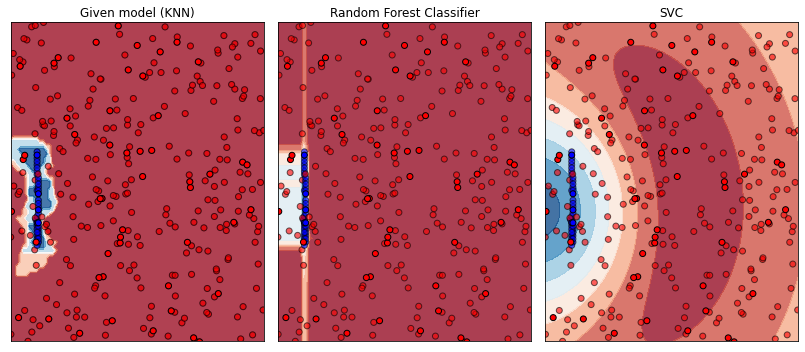

In [12]:
#requires all previous cells to have been run

#some variables and labels for the plots
names = ["Given model (KNN)", "Random Forest Classifier","SVC"] #add name here
xmin, xmax = x_train[:,0].min(), x_train[:,0].max()
ymin, ymax = x_train[:,1].min(), x_train[:,1].max()

#creating figure
figure = plt.figure(figsize=(15,5))
i = 1

#iterate over names to plot data

#ploting the data first
cm = plt.cm.RdBu
cm_b = ListedColormap(["#FF0000","#0000FF"])
ax = plt.subplot(1,len(names)+1,i)
#adding training data to graphs
#alpha set to 0.6 to make distinguishable
ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cm_b, alpha=0.6, edgecolors="k")
#adding test data to graphs
ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cm_b, alpha=1, edgecolors="k")
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin,ymax)
ax.set_xticks(())
ax.set_yticks(())
i+1

# iterate over names to plot predictions
for n in names:
    ax = plt.subplot(1,len(names)+1,i)
    if n == "Given model (KNN)":
        DecisionBoundaryDisplay.from_estimator(model_KNN, x_test, cmap = cm, alpha = 0.8, ax=ax, eps=0.5)
        score = m1_a
        ax.set_title(names[0])
    elif n == "Random Forest Classifier":
        DecisionBoundaryDisplay.from_estimator(model_forest, x_test, cmap = cm, alpha = 0.8, ax=ax, eps=0.5)
        score = m2_a
        ax.set_title(names[1])
    elif n == "SVC":
        DecisionBoundaryDisplay.from_estimator(model_svc, x_test, cmap = cm, alpha = 0.8, ax=ax, eps=0.5)
        score = m3_a
        ax.set_title(names[2])


    #alpha set to 0.6 to make distinguishable
    ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cm_b, alpha=0.6, edgecolors="k")
    #adding test data to graphs
    ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cm_b, alpha=1, edgecolors="k")
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin,ymax)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
        


plt.tight_layout()
plt.show()